In [61]:
import numpy as np

In [62]:
import lmfit as lft

In [63]:
import ligmods

In [64]:
L = ligmods.dilser()

In [65]:
def klotz1(flig,k1):
    "returns bound fraction given free ligand, L, and K (assoc.)"
    return (flig*k1)/(1+(flig*k1))

In [66]:
B = klotz1(L,2)

In [67]:
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline

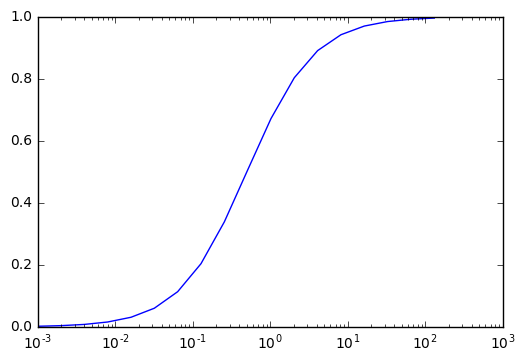

In [69]:
plt.semilogx(L,B)

In [70]:
datset = []
for i in range(5):
    datset.append(ligmods.noiser(B))

In [71]:
datset = np.array(datset)

In [72]:
datset

array([[ 0.00216535,  0.00383744,  0.00787106,  0.01675762,  0.03129615,
         0.06215036,  0.10942575,  0.18306662,  0.3777844 ,  0.52229566,
         0.69211703,  0.79763629,  0.89234875,  0.93366079,  0.97429128,
         1.00228685,  0.98571064,  0.93548001],
       [ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
         0.05933434,  0.11174053,  0.21593811,  0.32233841,  0.50123443,
         0.59045635,  0.88393524,  0.93780378,  0.89561906,  0.91647602,
         0.93119443,  0.93736802,  0.99352123],
       [ 0.00180835,  0.00412061,  0.00817626,  0.0165053 ,  0.03398984,
         0.05655903,  0.11510444,  0.20607522,  0.34837066,  0.46055096,
         0.60064339,  0.7379527 ,  0.86414689,  0.91487215,  0.96146738,
         0.99834069,  1.03929653,  1.12928547],
       [ 0.00202215,  0.00402982,  0.00842808,  0.01379452,  0.03138389,
         0.06390113,  0.1118252 ,  0.22826528,  0.33169998,  0.51174943,
         0.63311356,  0.84177744,  0.85801771,  0.941

In [73]:
datset_hi = []
for i in range(4):
    datset_hi.append(ligmods.noiser(B))

In [74]:
datset_hi.append(ligmods.noiser(B,percent=0.2))

In [75]:
datset_hi = np.array(datset_hi)

In [76]:
datset_hi[0:5]

array([[ 0.00187724,  0.00393101,  0.00786349,  0.01406016,  0.03238151,
         0.05796341,  0.11827131,  0.19361001,  0.33320262,  0.52031285,
         0.61174128,  0.81957384,  0.86740116,  0.99413731,  1.06033201,
         0.98361759,  1.08218149,  0.96810075],
       [ 0.00207402,  0.00436353,  0.00778438,  0.01647742,  0.02699019,
         0.06200547,  0.11651861,  0.20336994,  0.3547509 ,  0.482354  ,
         0.67696661,  0.82022061,  0.79320317,  1.00814525,  0.87967095,
         1.0268228 ,  0.80765415,  0.95203818],
       [ 0.00197448,  0.00400283,  0.00796216,  0.01471149,  0.02994043,
         0.06496828,  0.11324511,  0.20989974,  0.34067453,  0.51373209,
         0.72722964,  0.75389424,  0.93930348,  0.99146884,  1.0439656 ,
         0.9524688 ,  1.05796066,  0.94472979],
       [ 0.00205931,  0.00378524,  0.00754939,  0.0167567 ,  0.0305579 ,
         0.0641925 ,  0.11490437,  0.20729385,  0.32166873,  0.51812871,
         0.63868589,  0.75894897,  0.92457574,  0.961

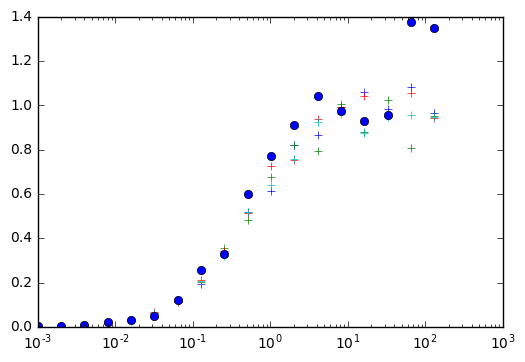

In [77]:
for i in range(4):
    plt.semilogx(L,datset_hi[i],'+')
plt.semilogx(L,datset_hi[4],'bo')

In [78]:
params = lft.Parameters()

In [79]:
params.add('k1',value=47)

In [80]:
params

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [81]:
params1 = params

In [82]:
def objfun(params,x,data,eps=None):
    nexp, npts = data.shape #number of experiments and number of data points per exp
    resid = np.zeros(data.shape)
    k1 = params['k1']
    model = klotz1(x,k1)
    
    if eps is None:
        for i in range(nexp):
            resid[i, :] = (data[i, :] - model)
            return resid.flatten()
    else:
        for i in range(nexp):
            weights = 1/(np.square(eps[i, :]))
            resid[i, :] = (data[i, :] - model)*weights
            return resid.flatten()

In [83]:
minner1 = lft.Minimizer(objfun,params1,fcn_args=(L,datset))

In [84]:
result1 = minner1.minimize()

In [85]:
lft.report_fit(result1)

[[Fit Statistics]]
    # function evals   = 20
    # data points      = 90
    # variables        = 1
    chi-square         = 0.006
    reduced chi-square = 0.000
    Akaike info crit   = -860.711
    Bayesian info crit = -858.211
[[Variables]]
    k1:   2.10599421 +/- 0.035799 (1.70%) (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [86]:
params1

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [87]:
minner2 = lft.Minimizer(objfun,params1,fcn_args=(L,datset_hi))

In [88]:
result2 = minner2.minimize()

In [89]:
lft.report_fit(result2)

[[Fit Statistics]]
    # function evals   = 20
    # data points      = 90
    # variables        = 1
    chi-square         = 0.024
    reduced chi-square = 0.000
    Akaike info crit   = -737.664
    Bayesian info crit = -735.165
[[Variables]]
    k1:   1.95067315 +/- 0.065687 (3.37%) (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [90]:
result2_1 = minner2.minimize(method='nelder')

In [91]:
lft.report_fit(result2_1)

[[Fit Statistics]]
    # function evals   = 49
    # data points      = 90
    # variables        = 1
    chi-square         = 0.024
    reduced chi-square = 0.000
    Akaike info crit   = -737.664
    Bayesian info crit = -735.165
[[Variables]]
    k1:   1.95068359 (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [92]:
datset

array([[ 0.00216535,  0.00383744,  0.00787106,  0.01675762,  0.03129615,
         0.06215036,  0.10942575,  0.18306662,  0.3777844 ,  0.52229566,
         0.69211703,  0.79763629,  0.89234875,  0.93366079,  0.97429128,
         1.00228685,  0.98571064,  0.93548001],
       [ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
         0.05933434,  0.11174053,  0.21593811,  0.32233841,  0.50123443,
         0.59045635,  0.88393524,  0.93780378,  0.89561906,  0.91647602,
         0.93119443,  0.93736802,  0.99352123],
       [ 0.00180835,  0.00412061,  0.00817626,  0.0165053 ,  0.03398984,
         0.05655903,  0.11510444,  0.20607522,  0.34837066,  0.46055096,
         0.60064339,  0.7379527 ,  0.86414689,  0.91487215,  0.96146738,
         0.99834069,  1.03929653,  1.12928547],
       [ 0.00202215,  0.00402982,  0.00842808,  0.01379452,  0.03138389,
         0.06390113,  0.1118252 ,  0.22826528,  0.33169998,  0.51174943,
         0.63311356,  0.84177744,  0.85801771,  0.941

In [93]:
datset.shape

(5, 18)

In [94]:
datset_errs = np.ones(datset.shape)

In [95]:
datset_errs

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.]])

In [96]:
twoz = datset_errs * 2

In [97]:
furs = twoz*2

In [98]:
furs

array([[ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.,  4.,  4.,  4.,  4.]])

In [99]:
twoz * furs

array([[ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.,  8.,  8.,  8.,  8.]])

In [100]:
np.random.randn(1,0.10)

/Users/michael/miniconda3/envs/fitter/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([], shape=(1, 0), dtype=float64)

In [101]:
testvars = np.random.normal(1,0.1,100)

In [102]:
np.average(testvars)

0.99791754493097951

In [103]:
np.std(testvars)

0.097422519008472333

In [104]:
np.max(testvars)

1.2784819276218666

In [105]:
np.min(testvars)

0.76538946355319015

In [106]:
errs = np.random.normal(1,0.05,datset.shape)

In [107]:
errs

array([[ 0.99602524,  1.09559521,  0.96228724,  0.94580345,  0.95845112,
         0.99163528,  1.05366772,  0.99709618,  1.06432792,  1.0177272 ,
         0.99667926,  0.98313588,  1.07342305,  1.00805642,  1.01110565,
         0.98761664,  0.98675566,  1.05333058],
       [ 1.02479793,  1.0337105 ,  0.92504185,  1.04496675,  1.00926277,
         1.02931284,  1.00578883,  0.95531297,  1.021438  ,  1.00592025,
         1.02326007,  0.93967542,  0.97450204,  0.99147268,  0.98075981,
         1.04600745,  1.04182684,  1.06270382],
       [ 1.08831002,  1.01631528,  0.97917637,  0.97230901,  0.99852602,
         0.9581194 ,  1.0502851 ,  0.90513107,  0.96184929,  0.95276889,
         0.99273269,  1.00624652,  1.0681076 ,  0.9604294 ,  0.90608012,
         0.97252831,  0.98872267,  0.99511869],
       [ 1.02280288,  1.06311521,  1.05679678,  1.01031937,  0.98595   ,
         1.00752895,  0.88453419,  0.99388409,  0.9584128 ,  1.05195019,
         1.0265686 ,  0.99365795,  0.88693944,  1.032

In [108]:
datset_sds = errs*datset

In [109]:
errs = np.random.rand(10)

In [110]:
errs

array([ 0.87999749,  0.68916566,  0.11694338,  0.34226022,  0.41269506,
        0.91300537,  0.12737839,  0.88120275,  0.500851  ,  0.48259102])

In [111]:
errs = np.random.normal(1,0.05,20)

In [112]:
errs

array([ 0.93087136,  1.040873  ,  0.93368521,  1.06606563,  1.01383244,
        0.89710338,  1.04150379,  0.91196203,  0.99177167,  1.08319092,
        1.00317185,  1.0522759 ,  1.11918689,  0.95308934,  1.02889135,
        0.99845311,  0.97347444,  0.99003277,  1.02542927,  0.9689184 ])

In [113]:
errs*=0.05

In [114]:
errs

array([ 0.04654357,  0.05204365,  0.04668426,  0.05330328,  0.05069162,
        0.04485517,  0.05207519,  0.0455981 ,  0.04958858,  0.05415955,
        0.05015859,  0.0526138 ,  0.05595934,  0.04765447,  0.05144457,
        0.04992266,  0.04867372,  0.04950164,  0.05127146,  0.04844592])

In [115]:
errs = np.random.normal(1,0.05,datset.shape)

In [116]:
errs *= 0.05

In [117]:
datset_sds = errs * datset

In [118]:
datset_sds

array([[  1.07561754e-04,   1.83208952e-04,   4.21918071e-04,
          8.82416991e-04,   1.43337578e-03,   3.28264084e-03,
          5.29450286e-03,   9.57843175e-03,   1.77234644e-02,
          2.42552530e-02,   3.68918163e-02,   4.15337399e-02,
          4.28529340e-02,   4.11670939e-02,   4.99458267e-02,
          5.19070637e-02,   4.70376485e-02,   4.49009832e-02],
       [  9.58137837e-05,   2.13693691e-04,   3.99152250e-04,
          8.61677800e-04,   1.35244357e-03,   2.85933483e-03,
          6.23557509e-03,   1.11335296e-02,   1.55793840e-02,
          2.36594980e-02,   3.05855511e-02,   4.75439492e-02,
          4.35489553e-02,   4.59136333e-02,   4.57449169e-02,
          4.73011276e-02,   4.76346657e-02,   4.91341323e-02],
       [  9.12415177e-05,   2.00301102e-04,   4.20633722e-04,
          8.45729524e-04,   1.67398797e-03,   2.81975730e-03,
          5.77368199e-03,   1.01222747e-02,   1.77406033e-02,
          2.20047138e-02,   3.09107839e-02,   3.78614398e-02,
      

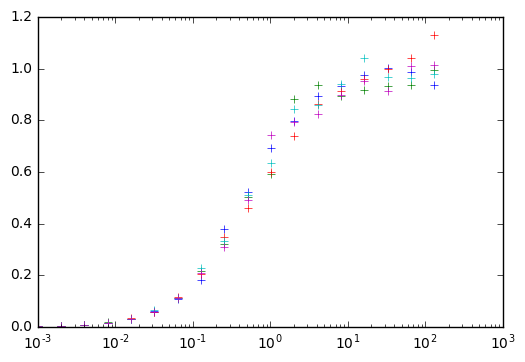

In [119]:
for i in range(5):
    plt.semilogx(L,datset[i],'+')
    

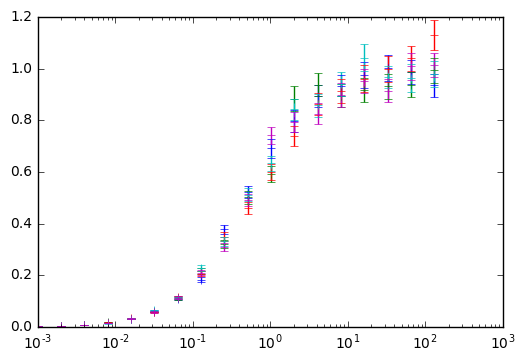

In [120]:
for i in range(5):
    plt.errorbar(L, datset[i], yerr=(datset_sds[i]), marker='+', linestyle='None')
    plt.xscale('log')

In [121]:
params

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [122]:
minner1.params

Parameters([('k1', <Parameter 'k1', 47, bounds=[-inf:inf]>)])

In [123]:
result1.params

Parameters([('k1',
             <Parameter 'k1', value=2.1059942129225204 +/- 0.0358, bounds=[-inf:inf]>)])

In [124]:
minner_wts = lft.Minimizer(objfun, params, fcn_args=(L,datset,datset_sds))

In [125]:
result_wts = minner_wts.minimize()

In [126]:
lft.report_fit(result_wts)

[[Fit Statistics]]
    # function evals   = 11
    # data points      = 90
    # variables        = 1
    chi-square         = 147410050.907
    reduced chi-square = 1656292.707
    Akaike info crit   = 1289.803
    Bayesian info crit = 1292.303
[[Variables]]
    k1:   2.08721448 +/- 0.011974 (0.57%) (init= 47)
[[Correlations]] (unreported correlations are <  0.100)


In [127]:
result_wts.params

Parameters([('k1',
             <Parameter 'k1', value=2.0872144843181877 +/- 0.012, bounds=[-inf:inf]>)])

In [128]:
result_wts.params.add('noise', value=0.01, min=0.0001, max=0.1)

In [129]:
def lnprob(params,x,data,eps=None):
    noise = params['noise']
    return -0.5 * np.sum((objfun(params,x,data,eps) / noise)**2 + np.log(2 * np.pi * noise**2))

In [130]:
mcmc_wts = lft.Minimizer(lnprob, result_wts.params, fcn_args=(L,datset))

In [131]:
result_mcmc_wts = mcmc_wts.emcee(burn=500, steps=1000, thin=30, is_weighted=False)

In [132]:
import corner

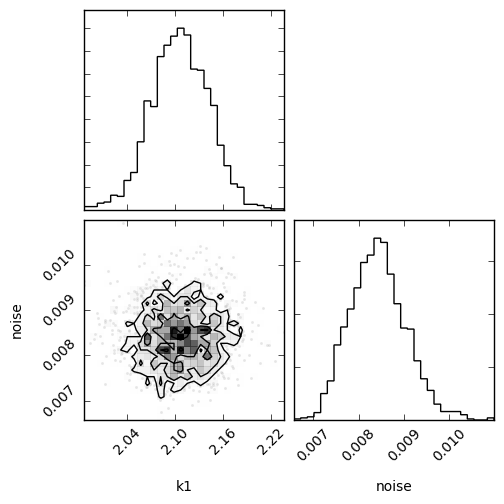

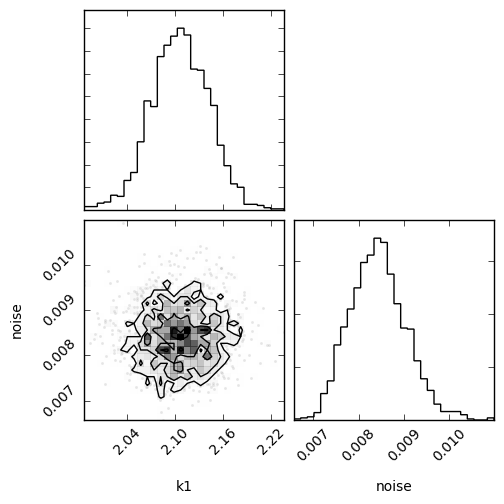

In [133]:
corner.corner(result_mcmc_wts.flatchain, bins=30)

In [134]:
datset

array([[ 0.00216535,  0.00383744,  0.00787106,  0.01675762,  0.03129615,
         0.06215036,  0.10942575,  0.18306662,  0.3777844 ,  0.52229566,
         0.69211703,  0.79763629,  0.89234875,  0.93366079,  0.97429128,
         1.00228685,  0.98571064,  0.93548001],
       [ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
         0.05933434,  0.11174053,  0.21593811,  0.32233841,  0.50123443,
         0.59045635,  0.88393524,  0.93780378,  0.89561906,  0.91647602,
         0.93119443,  0.93736802,  0.99352123],
       [ 0.00180835,  0.00412061,  0.00817626,  0.0165053 ,  0.03398984,
         0.05655903,  0.11510444,  0.20607522,  0.34837066,  0.46055096,
         0.60064339,  0.7379527 ,  0.86414689,  0.91487215,  0.96146738,
         0.99834069,  1.03929653,  1.12928547],
       [ 0.00202215,  0.00402982,  0.00842808,  0.01379452,  0.03138389,
         0.06390113,  0.1118252 ,  0.22826528,  0.33169998,  0.51174943,
         0.63311356,  0.84177744,  0.85801771,  0.941

In [135]:
datset[1]

array([ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
        0.05933434,  0.11174053,  0.21593811,  0.32233841,  0.50123443,
        0.59045635,  0.88393524,  0.93780378,  0.89561906,  0.91647602,
        0.93119443,  0.93736802,  0.99352123])

In [136]:
datset.shape

(5, 18)

In [137]:
datset

array([[ 0.00216535,  0.00383744,  0.00787106,  0.01675762,  0.03129615,
         0.06215036,  0.10942575,  0.18306662,  0.3777844 ,  0.52229566,
         0.69211703,  0.79763629,  0.89234875,  0.93366079,  0.97429128,
         1.00228685,  0.98571064,  0.93548001],
       [ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
         0.05933434,  0.11174053,  0.21593811,  0.32233841,  0.50123443,
         0.59045635,  0.88393524,  0.93780378,  0.89561906,  0.91647602,
         0.93119443,  0.93736802,  0.99352123],
       [ 0.00180835,  0.00412061,  0.00817626,  0.0165053 ,  0.03398984,
         0.05655903,  0.11510444,  0.20607522,  0.34837066,  0.46055096,
         0.60064339,  0.7379527 ,  0.86414689,  0.91487215,  0.96146738,
         0.99834069,  1.03929653,  1.12928547],
       [ 0.00202215,  0.00402982,  0.00842808,  0.01379452,  0.03138389,
         0.06390113,  0.1118252 ,  0.22826528,  0.33169998,  0.51174943,
         0.63311356,  0.84177744,  0.85801771,  0.941

In [140]:
datset_ed = datset

In [141]:
a = datset[1]

In [142]:
a

array([ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
        0.05933434,  0.11174053,  0.21593811,  0.32233841,  0.50123443,
        0.59045635,  0.88393524,  0.93780378,  0.89561906,  0.91647602,
        0.93119443,  0.93736802,  0.99352123])

In [145]:
np.delete(a,[6,7])

array([ 0.00198915,  0.00410239,  0.00759469,  0.01745825,  0.03017695,
        0.05933434,  0.32233841,  0.50123443,  0.59045635,  0.88393524,
        0.93780378,  0.89561906,  0.91647602,  0.93119443,  0.93736802,
        0.99352123])

In [146]:
datsetlist = datset.tolist()

In [147]:
datsetlist[1] = np.delete(datset_ed[1], [15,16]).tolist()

In [148]:
datsetlist

[[0.0021653529500684898,
  0.0038374360711251943,
  0.007871062795100582,
  0.016757617834792266,
  0.03129614909050428,
  0.062150358667197904,
  0.10942575038877397,
  0.18306662256702153,
  0.3777844040959427,
  0.5222956564828058,
  0.692117031546628,
  0.7976362853659018,
  0.8923487450193887,
  0.93366079381026,
  0.9742912791656394,
  1.0022868513788732,
  0.9857106444149555,
  0.9354800142170067],
 [0.0019891496749728415,
  0.004102386703701615,
  0.007594691814670061,
  0.01745824881888713,
  0.030176952509174165,
  0.05933434296953377,
  0.11174053265594268,
  0.21593810514704498,
  0.3223384057772006,
  0.5012344276951713,
  0.5904563475605931,
  0.8839352366461701,
  0.9378037787277318,
  0.8956190609658387,
  0.916476020534571,
  0.993521225031839],
 [0.0018083524794384553,
  0.004120613521275347,
  0.008176259408984558,
  0.016505297530973708,
  0.033989839745221996,
  0.05655903125290061,
  0.11510443549062137,
  0.20607521712033333,
  0.34837066369122316,
  0.4605509602

In [149]:
for i in datsetlist:
    print(len(i))

18
16
18
18
18


In [150]:
L

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [151]:
L.size

18

In [152]:
liglist = L.tolist()

In [153]:
liglist

[0.001,
 0.002,
 0.004,
 0.008,
 0.016,
 0.032,
 0.064,
 0.128,
 0.256,
 0.512,
 1.024,
 2.048,
 4.096,
 8.192,
 16.384,
 32.768,
 65.536,
 131.072]

In [154]:
ligarray = [liglist for i in range(5)]

In [155]:
arb = ligarray[1]

In [156]:
L

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [157]:
L_ed = np.delete(L, [15,16])

In [158]:
led = L_ed.tolist()

In [159]:
led

[0.001,
 0.002,
 0.004,
 0.008,
 0.016,
 0.032,
 0.064,
 0.128,
 0.256,
 0.512,
 1.024,
 2.048,
 4.096,
 8.192,
 16.384,
 131.072]

In [160]:
liglist

[0.001,
 0.002,
 0.004,
 0.008,
 0.016,
 0.032,
 0.064,
 0.128,
 0.256,
 0.512,
 1.024,
 2.048,
 4.096,
 8.192,
 16.384,
 32.768,
 65.536,
 131.072]

In [161]:
ligarray = [liglist, led, liglist, liglist, led]

In [162]:
ligarray

[[0.001,
  0.002,
  0.004,
  0.008,
  0.016,
  0.032,
  0.064,
  0.128,
  0.256,
  0.512,
  1.024,
  2.048,
  4.096,
  8.192,
  16.384,
  32.768,
  65.536,
  131.072],
 [0.001,
  0.002,
  0.004,
  0.008,
  0.016,
  0.032,
  0.064,
  0.128,
  0.256,
  0.512,
  1.024,
  2.048,
  4.096,
  8.192,
  16.384,
  131.072],
 [0.001,
  0.002,
  0.004,
  0.008,
  0.016,
  0.032,
  0.064,
  0.128,
  0.256,
  0.512,
  1.024,
  2.048,
  4.096,
  8.192,
  16.384,
  32.768,
  65.536,
  131.072],
 [0.001,
  0.002,
  0.004,
  0.008,
  0.016,
  0.032,
  0.064,
  0.128,
  0.256,
  0.512,
  1.024,
  2.048,
  4.096,
  8.192,
  16.384,
  32.768,
  65.536,
  131.072],
 [0.001,
  0.002,
  0.004,
  0.008,
  0.016,
  0.032,
  0.064,
  0.128,
  0.256,
  0.512,
  1.024,
  2.048,
  4.096,
  8.192,
  16.384,
  131.072]]

In [163]:
ligarray = np.array(ligarray)

In [164]:
ligarray.shape

(5,)

In [165]:
datset.size

90

In [166]:
datset.shape

(5, 18)

In [167]:
ligarray[1]

[0.001,
 0.002,
 0.004,
 0.008,
 0.016,
 0.032,
 0.064,
 0.128,
 0.256,
 0.512,
 1.024,
 2.048,
 4.096,
 8.192,
 16.384,
 131.072]

In [168]:
ligarray = [liglist, led, liglist, liglist, led]

In [169]:
test = np.array([np.array(i) for i in ligarray])

In [170]:
test.shape

(5,)

In [171]:
testdat = test

In [172]:
ligtest = test

In [173]:
ligtest[1][1]

0.002

In [174]:
bindtest = klotz1(ligtest,2)

In [175]:
bindtest[0].size

18

In [176]:
np.concatenate(bindtest).size

86

In [177]:
np.zeros(5).shape

(5,)

In [178]:
datset.flatten()

array([ 0.00216535,  0.00383744,  0.00787106,  0.01675762,  0.03129615,
        0.06215036,  0.10942575,  0.18306662,  0.3777844 ,  0.52229566,
        0.69211703,  0.79763629,  0.89234875,  0.93366079,  0.97429128,
        1.00228685,  0.98571064,  0.93548001,  0.00198915,  0.00410239,
        0.00759469,  0.01745825,  0.03017695,  0.05933434,  0.11174053,
        0.21593811,  0.32233841,  0.50123443,  0.59045635,  0.88393524,
        0.93780378,  0.89561906,  0.91647602,  0.93119443,  0.93736802,
        0.99352123,  0.00180835,  0.00412061,  0.00817626,  0.0165053 ,
        0.03398984,  0.05655903,  0.11510444,  0.20607522,  0.34837066,
        0.46055096,  0.60064339,  0.7379527 ,  0.86414689,  0.91487215,
        0.96146738,  0.99834069,  1.03929653,  1.12928547,  0.00202215,
        0.00402982,  0.00842808,  0.01379452,  0.03138389,  0.06390113,
        0.1118252 ,  0.22826528,  0.33169998,  0.51174943,  0.63311356,
        0.84177744,  0.85801771,  0.94100063,  1.04209704,  0.96

In [179]:
bindtest_n = ligmods.noiser(bindtest)

In [180]:
bindtest_n

array([ array([ 0.00189677,  0.00378597,  0.0075419 ,  0.01496503,  0.02946604,
        0.05715968,  0.10783316,  0.19368758,  0.32178783,  0.48077392,
        0.63850814,  0.76380409,  0.84689853,  0.89561565,  0.92213827,
        0.93599751,  0.94308453,  0.94666844]),
       array([ 0.00202057,  0.00403308,  0.00803415,  0.01594179,  0.03138925,
        0.06089043,  0.11487131,  0.20632936,  0.34279058,  0.51215352,
        0.68018289,  0.81365677,  0.9021747 ,  0.95407154,  0.98232525,
        1.00845649]),
       array([ 0.00189282,  0.00377811,  0.00752623,  0.01493393,  0.0294048 ,
        0.05704089,  0.10760906,  0.19328507,  0.32111911,  0.4797748 ,
        0.63718122,  0.76221679,  0.84513854,  0.89375443,  0.92022192,
        0.93405236,  0.94112466,  0.94470112]),
       array([ 0.00209417,  0.00418   ,  0.00832682,  0.01652252,  0.03253271,
        0.06310856,  0.11905587,  0.21384558,  0.35527784,  0.53081037,
        0.70496076,  0.84329686,  0.93503934,  0.98882669,  1

In [181]:
lerst = [[1,2,3],[4,5,6]]

In [182]:
np.concatenate(lerst)

array([1, 2, 3, 4, 5, 6])

In [183]:
ligtest[1]

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         1.31072000e+02])

In [184]:
bindtest_n - klotz1(ligtest,2)

array([ array([ -9.92421286e-05,  -1.98088870e-04,  -3.94605607e-04,
        -7.82996952e-04,  -1.54171493e-03,  -2.99069512e-03,
        -5.64202059e-03,  -1.01340752e-02,  -1.68365059e-02,
        -2.51549376e-02,  -3.34078699e-02,  -3.99635744e-02,
        -4.43112218e-02,  -4.68601876e-02,  -4.82478975e-02,
        -4.89730372e-02,  -4.93438428e-02,  -4.95313593e-02]),
       array([  2.45577695e-05,   4.90176992e-05,   9.76463691e-05,
         1.93755000e-04,   3.81502093e-04,   7.40056692e-04,
         1.39613532e-03,   2.50770803e-03,   4.16624508e-03,
         6.22466656e-03,   8.26688000e-03,   9.88910920e-03,
         1.09649479e-02,   1.15956973e-02,   1.19390904e-02,
         1.22566870e-02]),
       array([-0.00010318, -0.00020596, -0.00041028, -0.0008141 , -0.00160295,
       -0.00310948, -0.00586611, -0.01053659, -0.01750523, -0.02615406,
       -0.03473479, -0.04155087, -0.0460712 , -0.04872141, -0.05016424,
       -0.05091818, -0.05130371, -0.05149868]),
       array([

In [185]:
bindtest_n[1] - klotz1(ligtest[1],2)

array([  2.45577695e-05,   4.90176992e-05,   9.76463691e-05,
         1.93755000e-04,   3.81502093e-04,   7.40056692e-04,
         1.39613532e-03,   2.50770803e-03,   4.16624508e-03,
         6.22466656e-03,   8.26688000e-03,   9.88910920e-03,
         1.09649479e-02,   1.15956973e-02,   1.19390904e-02,
         1.22566870e-02])

In [186]:
klotz1(ligtest[1],2)

array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.9961998 ])

In [189]:
klotz1(ligtest[1],2)

array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.9961998 ])

In [191]:
bindtest_n.size

5

In [192]:
ligtest.size

5

In [203]:
np.concatenate([bindtest_n[i]-klotz1(ligtest[i],2) for i in range(bindtest_n.size)])
    

array([ -9.92421286e-05,  -1.98088870e-04,  -3.94605607e-04,
        -7.82996952e-04,  -1.54171493e-03,  -2.99069512e-03,
        -5.64202059e-03,  -1.01340752e-02,  -1.68365059e-02,
        -2.51549376e-02,  -3.34078699e-02,  -3.99635744e-02,
        -4.43112218e-02,  -4.68601876e-02,  -4.82478975e-02,
        -4.89730372e-02,  -4.93438428e-02,  -4.95313593e-02,
         2.45577695e-05,   4.90176992e-05,   9.76463691e-05,
         1.93755000e-04,   3.81502093e-04,   7.40056692e-04,
         1.39613532e-03,   2.50770803e-03,   4.16624508e-03,
         6.22466656e-03,   8.26688000e-03,   9.88910920e-03,
         1.09649479e-02,   1.15956973e-02,   1.19390904e-02,
         1.22566870e-02,  -1.03183894e-04,  -2.05956697e-04,
        -4.10278817e-04,  -8.14096551e-04,  -1.60294980e-03,
        -3.10948156e-03,  -5.86611416e-03,  -1.05365872e-02,
        -1.75052295e-02,  -2.61540584e-02,  -3.47347862e-02,
        -4.15508745e-02,  -4.60712046e-02,  -4.87214120e-02,
        -5.01642399e-02,

In [204]:
ligtest

array([ array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02]),
       array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         1.31072000e+02]),
       array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200

In [206]:
a = np.random.normal(1,0.05,)

In [207]:
a

array([ 0.9952985 ,  1.0977587 ,  0.99182535,  1.13686621,  0.99910913,
        1.06725731,  1.14621188,  0.99861895,  1.0365839 ,  0.92862425,
        1.05700944,  0.77112649,  1.31114209,  0.9076368 ,  1.10030095,
        1.16743763,  1.08464927,  1.10059148,  0.8689428 ,  0.97285537,
        0.99975231,  1.13227336,  1.03370138,  0.97182784,  1.07543169,
        1.24526741,  0.99823205,  0.97865062,  1.04331694,  0.99042353,
        0.99612907,  0.90699553,  0.97593444,  0.94392889,  1.01780036,
        1.04016585,  1.12519873,  1.13698349,  0.9913542 ,  1.01908801,
        1.07862838,  1.02490574,  1.00107093,  1.03056678,  0.99994559,
        1.06459   ,  0.90799908,  1.14951419,  1.07210018,  0.90815855,
        1.0897541 ,  1.06833061,  1.01901703,  0.98776961,  0.93252421,
        0.98758258,  1.00994754,  1.11469884,  1.14273193,  0.995362  ,
        0.901537  ,  0.79426271,  1.14575963,  0.98576014,  0.95583861,
        1.04135576,  1.08412725,  0.86411982,  0.93188907,  0.98

In [208]:
np.average(a)

1.012846679923125

In [209]:
np.std(a)

0.092707196001798789

In [213]:
ligar = ligtest

In [214]:
bindar = klotz1(ligar,2)

In [215]:
bindar

array([ array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.98497054,  0.99242837,  0.9961998 ]),
       array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.9961998 ]),
       array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.98497054,  0.99242837,  0.9961998 ]),
       array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0

In [217]:
bindar - klotz1(ligar,2)

array([ array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]),
       array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.]),
       array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]),
       array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.]),
       array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])], dtype=object)

In [218]:
bindar = ligmods.noiser(bindar)

In [219]:
bindar - klotz1(ligar,2)

array([ array([  7.22336293e-05,   1.44179475e-04,   2.87214669e-04,
         5.69906272e-04,   1.12214103e-03,   2.17678486e-03,
         4.10655867e-03,   7.37611175e-03,   1.22544925e-02,
         1.83090837e-02,   2.43160010e-02,   2.90875867e-02,
         3.22520326e-02,   3.41073037e-02,   3.51173518e-02,
         3.56451465e-02,   3.59150383e-02,   3.60515226e-02]),
       array([ -3.98688811e-06,  -7.95789220e-06,  -1.58526265e-05,
        -3.14556054e-05,  -6.19358432e-05,  -1.20146222e-04,
        -2.26658830e-04,  -4.07119683e-04,  -6.76378732e-04,
        -1.01055795e-03,  -1.34210583e-03,  -1.60547040e-03,
        -1.78012993e-03,  -1.88253041e-03,  -1.93827935e-03,
        -1.98984030e-03]),
       array([  8.52837225e-05,   1.70227669e-04,   3.39104325e-04,
         6.72868425e-04,   1.32487271e-03,   2.57005383e-03,
         4.84847035e-03,   8.70871745e-03,   1.44684512e-02,
         2.16168955e-02,   2.87090528e-02,   3.43426974e-02,
         3.80788481e-02,   4.02693

In [220]:
bindar - klotz1(ligar,2)

array([ array([  7.22336293e-05,   1.44179475e-04,   2.87214669e-04,
         5.69906272e-04,   1.12214103e-03,   2.17678486e-03,
         4.10655867e-03,   7.37611175e-03,   1.22544925e-02,
         1.83090837e-02,   2.43160010e-02,   2.90875867e-02,
         3.22520326e-02,   3.41073037e-02,   3.51173518e-02,
         3.56451465e-02,   3.59150383e-02,   3.60515226e-02]),
       array([ -3.98688811e-06,  -7.95789220e-06,  -1.58526265e-05,
        -3.14556054e-05,  -6.19358432e-05,  -1.20146222e-04,
        -2.26658830e-04,  -4.07119683e-04,  -6.76378732e-04,
        -1.01055795e-03,  -1.34210583e-03,  -1.60547040e-03,
        -1.78012993e-03,  -1.88253041e-03,  -1.93827935e-03,
        -1.98984030e-03]),
       array([  8.52837225e-05,   1.70227669e-04,   3.39104325e-04,
         6.72868425e-04,   1.32487271e-03,   2.57005383e-03,
         4.84847035e-03,   8.70871745e-03,   1.44684512e-02,
         2.16168955e-02,   2.87090528e-02,   3.43426974e-02,
         3.80788481e-02,   4.02693

In [221]:
bindar = klotz1(ligar,2)

In [222]:
bindar

array([ array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.98497054,  0.99242837,  0.9961998 ]),
       array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.9961998 ]),
       array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0.97038616,
        0.98497054,  0.99242837,  0.9961998 ]),
       array([ 0.00199601,  0.00398406,  0.00793651,  0.01574803,  0.03100775,
        0.06015038,  0.11347518,  0.20382166,  0.33862434,  0.50592885,
        0.67191601,  0.80376766,  0.89120975,  0.94247584,  0

In [224]:
noisar = np.array([np.random.normal(1,0.05,bindar[i].size) for i in range(bindar.size)])

In [227]:
bindarn = noisar*bindar

In [228]:
bindarn - bindar

array([ array([ -5.81191462e-05,  -1.79504841e-04,  -5.31430637e-04,
         5.85177026e-04,   1.98783421e-03,  -1.95155413e-03,
        -7.00010065e-04,  -1.36659690e-02,   2.19802955e-02,
         2.39902631e-02,  -3.24779348e-02,   8.01232172e-03,
        -2.95929903e-02,   5.35132450e-02,   7.18835222e-02,
         3.16722658e-02,  -1.32619548e-02,  -1.21588072e-01]),
       array([ -3.96035900e-05,   3.31407753e-04,   5.12904337e-04,
        -6.10904025e-04,  -6.48258544e-04,  -5.86401137e-04,
        -3.48518125e-03,  -8.22243250e-05,   1.22475283e-02,
        -1.56722934e-02,  -1.23918940e-02,  -2.40363876e-02,
        -4.63403251e-02,  -1.65235337e-02,  -2.04784290e-02,
         5.52016686e-02]),
       array([  5.78412096e-05,   3.44061226e-05,   9.38233360e-05,
        -6.65971246e-04,  -9.86325240e-04,  -2.42502456e-03,
        -4.30369869e-03,  -1.85669414e-02,   8.45093029e-04,
        -9.13479906e-04,   6.26252284e-02,  -5.80679525e-02,
        -4.40246397e-02,  -1.42088

In [229]:
bindarn - klotz1(ligar,2)

array([ array([ -5.81191462e-05,  -1.79504841e-04,  -5.31430637e-04,
         5.85177026e-04,   1.98783421e-03,  -1.95155413e-03,
        -7.00010065e-04,  -1.36659690e-02,   2.19802955e-02,
         2.39902631e-02,  -3.24779348e-02,   8.01232172e-03,
        -2.95929903e-02,   5.35132450e-02,   7.18835222e-02,
         3.16722658e-02,  -1.32619548e-02,  -1.21588072e-01]),
       array([ -3.96035900e-05,   3.31407753e-04,   5.12904337e-04,
        -6.10904025e-04,  -6.48258544e-04,  -5.86401137e-04,
        -3.48518125e-03,  -8.22243250e-05,   1.22475283e-02,
        -1.56722934e-02,  -1.23918940e-02,  -2.40363876e-02,
        -4.63403251e-02,  -1.65235337e-02,  -2.04784290e-02,
         5.52016686e-02]),
       array([  5.78412096e-05,   3.44061226e-05,   9.38233360e-05,
        -6.65971246e-04,  -9.86325240e-04,  -2.42502456e-03,
        -4.30369869e-03,  -1.85669414e-02,   8.45093029e-04,
        -9.13479906e-04,   6.26252284e-02,  -5.80679525e-02,
        -4.40246397e-02,  -1.42088

In [230]:
def klotz_mod(flig,k1,H):
    "returns bound fraction given free ligand, L, and K (assoc.)"
    return (flig*H*k1)/(1+(flig*H*k1))

In [231]:
Har = [1,2,3,4,5]

In [232]:
ligar.size

5

In [241]:
krid = np.array(klotz_mod(ligar,2,Har))

In [242]:
crud = np.array([klotz_mod(ligar[i],2,Har[i])for i in range(len(Har))])

In [237]:
[1,2,3] + [3, 4, 5]

[1, 2, 3, 3, 4, 5]

In [247]:
print(list(range(5)))

[0, 1, 2, 3, 4]


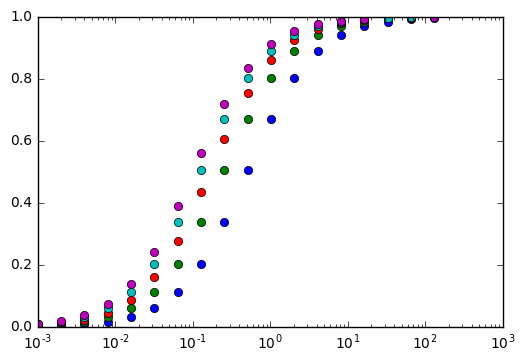

In [249]:
for i in range(5):
    plt.semilogx(ligar[i],krid[i],'o')

In [250]:
famar = noisar*krid

In [251]:
famar

array([ array([ 0.00193789,  0.00380456,  0.00740508,  0.01633321,  0.03299559,
        0.05819882,  0.11277517,  0.19015569,  0.36060463,  0.52991912,
        0.63943808,  0.81177998,  0.86161676,  0.99598908,  1.04226969,
        1.01664281,  0.97916642,  0.87461173]),
       array([ 0.00390501,  0.00859669,  0.01676576,  0.02980489,  0.05889285,
        0.11236892,  0.19756165,  0.33848773,  0.52422753,  0.65110189,
        0.78894408,  0.86455844,  0.89346983,  0.95337331,  0.96418433,
        1.05340304]),
       array([ 0.00613705,  0.01196011,  0.02371457,  0.04386462,  0.08480505,
        0.15457997,  0.26693373,  0.39481887,  0.6071898 ,  0.75305829,
        0.94017988,  0.85793627,  0.91343355,  0.96528515,  1.00304429,
        0.97739931,  0.97948756,  1.06541101]),
       array([ 0.00741209,  0.01661346,  0.0312028 ,  0.05694372,  0.12144411,
        0.19345814,  0.33345122,  0.53363706,  0.6783858 ,  0.81078314,
        0.85357135,  0.97802131,  0.98822167,  1.03305722,  1

In [252]:
famar-krid

array([ array([ -5.81191462e-05,  -1.79504841e-04,  -5.31430637e-04,
         5.85177026e-04,   1.98783421e-03,  -1.95155413e-03,
        -7.00010065e-04,  -1.36659690e-02,   2.19802955e-02,
         2.39902631e-02,  -3.24779348e-02,   8.01232172e-03,
        -2.95929903e-02,   5.35132450e-02,   7.18835222e-02,
         3.16722658e-02,  -1.32619548e-02,  -1.21588072e-01]),
       array([ -7.90493968e-05,   6.60185286e-04,   1.01773144e-03,
        -1.20286529e-03,  -1.25752409e-03,  -1.10626030e-03,
        -6.26000709e-03,  -1.36605492e-04,   1.82986787e-02,
        -2.08141219e-02,  -1.48235844e-02,  -2.66513123e-02,
        -4.90060134e-02,  -1.70128590e-02,  -2.07862087e-02,
         5.53067570e-02]),
       array([ 0.00017283,  0.0001024 ,  0.00027707, -0.00193691, -0.00278619,
       -0.00649386, -0.01052292, -0.03957027,  0.00151157, -0.00136214,
        0.08015749, -0.06680786, -0.04746729, -0.01477546,  0.01311438,
       -0.01754017, -0.01797576,  0.06668096]),
       array([

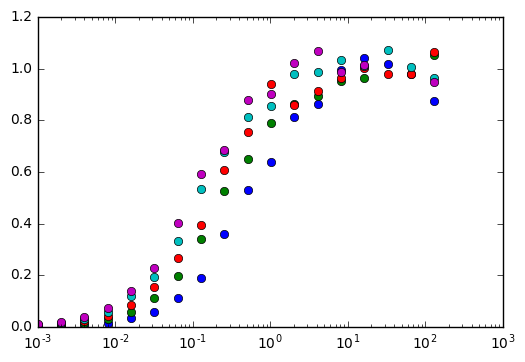

In [254]:
for i in range(5):
    plt.semilogx(ligar[i],famar[i],'o')

In [255]:
type(famar)

numpy.ndarray

In [258]:
derbly = famar - klotz_mod(ligar,2,Har)

In [292]:
def globfun(params,x,y,kpar,eps=None):
    k1 = params['k1']
    model = (x*kpar*k1)/(1 + (x*kpar*k1))
    
    if eps is None:
        return np.concatenate((y - model))
    else:
        weights = 1/np.square(eps)
        return np.concatenate((y - model)*weights)

In [293]:
globparm = lft.Parameters()

In [294]:
globparm.add('k1', value=37)

In [295]:
globfun(globparm, ligar, famar, Har).shape

(86,)

In [296]:
glob_minner = lft.Minimizer(globfun,globparm,fcn_args=(ligar,famar,Har))

In [297]:
result_glob = glob_minner.minimize()

In [298]:
lft.report_fit(result_glob)

[[Fit Statistics]]
    # function evals   = 18
    # data points      = 86
    # variables        = 1
    chi-square         = 0.089
    reduced chi-square = 0.001
    Akaike info crit   = -588.645
    Bayesian info crit = -586.190
[[Variables]]
    k1:   2.00500370 +/- 0.059338 (2.96%) (init= 37)
[[Correlations]] (unreported correlations are <  0.100)


In [304]:
errar = 0.05*famar

In [324]:
boundparm = lft.Parameters()

In [325]:
boundparm.add('k1',value=23,min=0.1,max=1000)

In [326]:
glob_minner_wts = lft.Minimizer(globfun,boundparm,fcn_args=(ligar,famar,Har,errar))

In [327]:
result_glob_wts = glob_minner_wts.minimize(method="leastsq")

In [333]:
lft.report_fit(result_glob_wts)

[[Fit Statistics]]
    # function evals   = 13
    # data points      = 86
    # variables        = 1
    chi-square         = 71.387
    reduced chi-square = 0.840
    Akaike info crit   = -14.016
    Bayesian info crit = -11.562
[[Variables]]
    k1:   1.97830142 +/- 0.015717 (0.79%) (init= 23)
[[Correlations]] (unreported correlations are <  0.100)


In [337]:
result_glob_wts.params

lmfit.parameter.Parameters